In [1]:
import tensorflow as tf
print("Tensorflow version: ", tf.__version__)

Tensorflow version:  2.6.0


In [2]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 12485830843488267260
]


### Tensor: Multi deimensional array used in Tensorflow
* Constant
* Variable

In [3]:
import numpy as np

In [4]:
# define a scalar as constant
a = tf.constant(3)
print("Tensor a's rank is {}".format(tf.rank(a)))
a

Tensor a's rank is 0


<tf.Tensor: shape=(), dtype=int32, numpy=3>

In [5]:
# define a matrix as constant
b = tf.constant([[1, 2], [0, 0]])
print("Tensor rank is {}".format(tf.rank(b)))

Tensor rank is 2


In [6]:
# define ndarray as constant
c = tf.constant(np.random.rand(2,2))
print("Tensor rank is {}".format(tf.rank(c)))
c

Tensor rank is 2


<tf.Tensor: shape=(2, 2), dtype=float64, numpy=
array([[0.2379978 , 0.602721  ],
       [0.50759411, 0.77619511]])>

In [7]:
# define a scalar as variable
x = tf.Variable(3)
x

<tf.Variable 'Variable:0' shape=() dtype=int32, numpy=3>

In [8]:
# convert a constant as a variable
x = tf.Variable(a)
x

<tf.Variable 'Variable:0' shape=() dtype=int32, numpy=3>

In [9]:
# Variable could assign new value, but constant could not be re-assigned
# a.assign(0) # wrong
x.assign(0) # right

<tf.Variable 'UnreadVariable' shape=() dtype=int32, numpy=0>

In [10]:
# type cast
b = tf.constant([[1, 2], [3, 4]])
print(b)

tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32)


In [11]:
b = tf.cast(b, dtype = tf.float32)
print(b)

tf.Tensor(
[[1. 2.]
 [3. 4.]], shape=(2, 2), dtype=float32)


In [12]:
# simple function
# x = tf.Variable(2) # correct
# y = tf.Variable(5)
x = tf.constant(2) # correct
y = tf.constant(5)
f = x * x * y + y + 2
print(f.numpy()) # f.numpy() show the value of numpy
print(f)

27
tf.Tensor(27, shape=(), dtype=int32)


In [13]:
tensor_test = tf.constant([[1,2],[3,4]])
tensor_test

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[1, 2],
       [3, 4]], dtype=int32)>

In [14]:
tensor_test.shape

TensorShape([2, 2])

In [15]:
tensor_test.numpy()

array([[1, 2],
       [3, 4]], dtype=int32)

In [16]:
# broadcasting: add the int to every element in the matrix
tensor_test = tensor_test + 6
tensor_test

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 7,  8],
       [ 9, 10]], dtype=int32)>

In [17]:
# square
tensor_test = tf.constant([[1,2],[3,4]])
tensor_test = tf.square(tensor_test)
tensor_test

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 1,  4],
       [ 9, 16]], dtype=int32)>

In [18]:
# sqrt, has to be float for sqrt
tensor_test = tf.constant([[1., 4.], [9.,16.]])
tensor_test = tf.sqrt(tensor_test)
tensor_test

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[1., 2.],
       [3., 4.]], dtype=float32)>

In [19]:
tensor_test = tf.matmul(tensor_test, tensor_test)
tensor_test

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[ 7., 10.],
       [15., 22.]], dtype=float32)>

In [20]:
# numpy function could be used for tensor calculation, return numpy array
tensor_test = tf.constant([[1,4],[9,16]])
np.square(tensor_test)

array([[  1,  16],
       [ 81, 256]], dtype=int32)

### TensorFlow automatic derivation mechanism
#### only calculate derivation for variable tensor

In [21]:
# tf.GradientTape --> derivation
x = tf.Variable([2.]) # has to be variable, has to be float
# x = tf.Variable([2])

with tf.GradientTape(persistent=False, watch_accessed_variables=True) as tape:
    f = x ** 2
    
print("The gradient df/df where f=(x^2):\n", tape.gradient(f, x))

The gradient df/df where f=(x^2):
 tf.Tensor([4.], shape=(1,), dtype=float32)


In [22]:
# the variable tensor has to be float, when calculate its derivation

# wrong: has to be variable, not constant
x = tf.constant([2.0])
with tf.GradientTape(persistent=False, watch_accessed_variables=True) as tape:
    f = x ** 2
    
print('The gradient df/fx where f = (x ^ 2):\n', tape.gradient(f, x))

# wrong: has to be float, not int
x = tf.Variable([2])

with tf.GradientTape(persistent=False, watch_accessed_variables=True) as tape:
    f = x ** 2
    
print('The gradient df/dx where f=(x ^ 2):\n', tape.gradient(f, x))

# correct
x = tf.Variable([2.0])

with tf.GradientTape(persistent=False, watch_accessed_variables=True) as tape:
    f = x ** 2
    
print('The gradient df/dx where f=(x ^ 2):\n', tape.gradient(f, x))

The gradient df/fx where f = (x ^ 2):
 None
The gradient df/dx where f=(x ^ 2):
 None
The gradient df/dx where f=(x ^ 2):
 tf.Tensor([4.], shape=(1,), dtype=float32)


In [23]:
# calculate gradient descent for multiple functions
x = tf.Variable([2.0])
y = tf.Variable([3.0])

with tf.GradientTape(persistent=True, watch_accessed_variables=True) as tape:
    f = x ** 2
    h = y ** 3

# Print gradient output
print('The gradient df/dx where f = (x ^ 2):\n', tape.gradient(f, x))
print('The gradient dh/dx where h = (x ^ 3):\n', tape.gradient(h, y))

The gradient df/dx where f = (x ^ 2):
 tf.Tensor([4.], shape=(1,), dtype=float32)
The gradient dh/dx where h = (x ^ 3):
 tf.Tensor([27.], shape=(1,), dtype=float32)


In [24]:
# wrong: persistent=False: only get derivation for the 1st variable
x = tf.Variable([2.0])
y = tf.Variable([3.0])

with tf.GradientTape(persistent=False, watch_accessed_variables=True) as tape:
    f = x ** 2
    h = y ** 3

# Print gradient output
print('The gradient df/dx where f = (x ^ 2):\n', tape.gradient(f, x))
print('The gradient dh/dy where h = (y ^ 3):\n', tape.gradient(h, y))

The gradient df/dx where f = (x ^ 2):
 tf.Tensor([4.], shape=(1,), dtype=float32)


RuntimeError: A non-persistent GradientTape can only be used to compute one set of gradients (or jacobians)

In [25]:
# persistent=True: could get derivation for all variables
# watch_accessed_variables=True: trace all vars
x = tf.Variable([2.0])
y = tf.Variable([3.0])

with tf.GradientTape(persistent=True, watch_accessed_variables=True) as tape:
    f = x ** 2
    h = y ** 3

# Print gradient output
print('The gradient df/dx where f = (x ^ 2):\n', tape.gradient(f, x))
print('The gradient dh/dy where h = (y ^ 3):\n', tape.gradient(h, y))

The gradient df/dx where f = (x ^ 2):
 tf.Tensor([4.], shape=(1,), dtype=float32)
The gradient dh/dy where h = (y ^ 3):
 tf.Tensor([27.], shape=(1,), dtype=float32)


In [26]:
# watch_accessed_variables=False: trace the var(s) that assigns to tape.watch()
x = tf.Variable([2.0])
y = tf.Variable([3.0])

with tf.GradientTape(persistent=True, watch_accessed_variables=False) as tape:
    tape.watch(y)
    f = x ** 2
    h = y ** 3

# Print gradient output
print('The gradient df/dx where f = (x ^ 2):\n', tape.gradient(f, x))
print('The gradient dh/dy where h = (y ^ 3):\n', tape.gradient(h, y))

The gradient df/dx where f = (x ^ 2):
 None
The gradient dh/dy where h = (y ^ 3):
 tf.Tensor([27.], shape=(1,), dtype=float32)


In [27]:
# calculate multi-var's derivation
x = tf.Variable([2.0])
y = tf.Variable([3.0])

with tf.GradientTape(persistent=True, watch_accessed_variables=True) as tape:
    f = x ** 2 * y + y + 2

# Print gradient output
print('The gradient df/dx and df/dy where f = (x ^ 2 * y + y + 2):\n', tape.gradient(f, [x, y]))

The gradient df/dx and df/dy where f = (x ^ 2 * y + y + 2):
 [<tf.Tensor: shape=(1,), dtype=float32, numpy=array([12.], dtype=float32)>, <tf.Tensor: shape=(1,), dtype=float32, numpy=array([5.], dtype=float32)>]


### Linear Regression in Tensorflow

In [28]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [29]:
def f(X):
    """
    input: x
    output: y = 0.7x - 42(56)
    """
    return 0.7 * X - 42

In [30]:
# populate data
N = 100
noise_level = 0.8
trainX = np.linspace(165, 190, N)
# np.random.shuffle(trainX)
# print(trainX)
trainY = f(trainX) + np.random.randn(N) * noise_level
# print(trainY)
learning_rate = 0.1
training_epochs = 300
display_step = 50

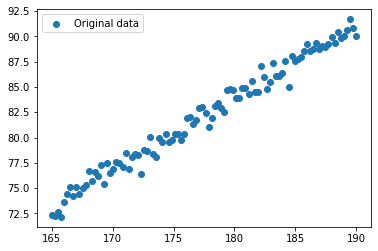

In [31]:
plt.scatter(trainX, trainY, label='Original data')
plt.legend()

In [32]:
def lr_forward(x, w, b):
    return x * w + b

# use MSE (mean square error)
def loss_function(y, y_hat):
    return tf.reduce_mean(tf.square(y - y_hat))

def data_loader(x, y, batch_size, shuffle=True):
    ind = list(range(len(x)))
    if shuffle == True:
        np.random.shuffle(ind)
    for i in range(0, len(ind), batch_size):
        idx = np.array(ind[i:min(i + batch_size, len(x))])
        yield x[idx], y[idx]

In [33]:
# init param
w = tf.Variable(np.random.randn())
b = tf.Variable(np.random.randn())
batch_size = 32

trainX = np.reshape(trainX, (-1, 1))
trainY = np.reshape(trainY, (-1, 1))
trainX, testX, trainY, testY = train_test_split(trainX,
                                                trainY,
                                                test_size=0.2,
                                                random_state=1)

In [34]:
# data process
x_scaler = StandardScaler()
y_scaler = StandardScaler()
# trainX = (trainX - trainX.min()) / (trainX.max() - trainX.min())
# trainY = (trainY - trainY.min()) / (trainY.max() - trainY.min())

trainX = x_scaler.fit_transform(trainX)
trainY = y_scaler.fit_transform(trainY)


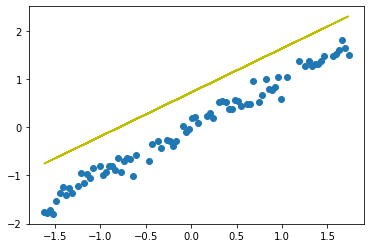

In [35]:
# observe init fit line
plt.scatter(trainX, trainY, label='Original Data')
plt.plot(trainX, lr_forward(trainX, w, b), c='y', label='Fitted Line')

In [36]:
# start training
for i in range(training_epochs):
    for X, y in data_loader(trainX, trainY, batch_size):
        with tf.GradientTape(persistent=True, watch_accessed_variables=True) as tape:        
            # calculate the loss in this iteration
            loss = loss_function(y, lr_forward(X, w, b))
            
        # calculate gradient, update param
        delta_w, delta_b = tape.gradient(loss, [w, b])
        w.assign_sub(learning_rate * delta_w)
        b.assign_sub(learning_rate * delta_b)
    
    # calculate the total loss of this iteration
    train_loss = loss_function(trainY, lr_forward(trainX, w, b))
    print('epoch %d, loss %f' % (i + 1, tf.reduce_mean(train_loss)))        

epoch 1, loss 0.154033
epoch 2, loss 0.054151
epoch 3, loss 0.029142
epoch 4, loss 0.022642
epoch 5, loss 0.020482
epoch 6, loss 0.019687
epoch 7, loss 0.019447
epoch 8, loss 0.019484
epoch 9, loss 0.019495
epoch 10, loss 0.019491
epoch 11, loss 0.019466
epoch 12, loss 0.019456
epoch 13, loss 0.019550
epoch 14, loss 0.019657
epoch 15, loss 0.019529
epoch 16, loss 0.019452
epoch 17, loss 0.019458
epoch 18, loss 0.019475
epoch 19, loss 0.019490
epoch 20, loss 0.019537
epoch 21, loss 0.019475
epoch 22, loss 0.019442
epoch 23, loss 0.019444
epoch 24, loss 0.019456
epoch 25, loss 0.019473
epoch 26, loss 0.019444
epoch 27, loss 0.019445
epoch 28, loss 0.019455
epoch 29, loss 0.019530
epoch 30, loss 0.019525
epoch 31, loss 0.019463
epoch 32, loss 0.019505
epoch 33, loss 0.019490
epoch 34, loss 0.019461
epoch 35, loss 0.019470
epoch 36, loss 0.019490
epoch 37, loss 0.019441
epoch 38, loss 0.019486
epoch 39, loss 0.019534
epoch 40, loss 0.019506
epoch 41, loss 0.019544
epoch 42, loss 0.019547
e

In [37]:
processed_x = x_scaler.transform(np.reshape(testX, (-1, 1)))
predicted_y = y_scaler.inverse_transform(lr_forward(processed_x, w, b))

In [38]:
r2_score(testY, predicted_y)

0.9813898422929066

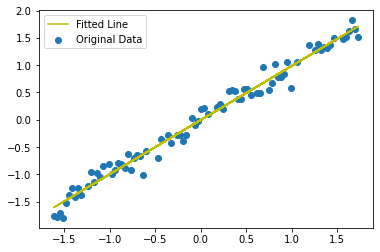

In [39]:
plt.scatter(trainX, trainY, label='Original Data')
plt.plot(trainX, lr_forward(trainX, w, b), c='y', label='Fitted Line')
plt.legend()

In [40]:
print(w)
print(b)

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.99099463>
<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=-0.0056371493>


In [41]:
# restore w_true & b_true
print(w * y_scaler.scale_ / x_scaler.scale_)
print(- w * y_scaler.scale_ / x_scaler.scale_ * x_scaler.mean_ + y_scaler.scale_ * b + y_scaler.mean_)

tf.Tensor([0.71529025], shape=(1,), dtype=float32)
tf.Tensor([-44.8295], shape=(1,), dtype=float32)


### Keras API version

In [42]:
# Use Keras to build the linear model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1, input_dim=1))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [43]:
model.compile(optimizer='sgd', loss='mse', metrics='mse')
history = model.fit(trainX, trainY, steps_per_epoch=8, epochs=300)

Epoch 1/300
8/8 [==============================] - 0s 814us/step - loss: 0.1814 - mse: 0.1814
Epoch 2/300
8/8 [==============================] - 0s 783us/step - loss: 0.1369 - mse: 0.1369
Epoch 3/300
8/8 [==============================] - 0s 807us/step - loss: 0.1044 - mse: 0.1044
Epoch 4/300
8/8 [==============================] - 0s 889us/step - loss: 0.0808 - mse: 0.0808
Epoch 5/300
8/8 [==============================] - 0s 910us/step - loss: 0.0640 - mse: 0.0640
Epoch 6/300
8/8 [==============================] - 0s 761us/step - loss: 0.0516 - mse: 0.0516
Epoch 7/300
8/8 [==============================] - 0s 1ms/step - loss: 0.0428 - mse: 0.0428
Epoch 8/300
8/8 [==============================] - 0s 789us/step - loss: 0.0362 - mse: 0.0362
Epoch 9/300
8/8 [==============================] - 0s 838us/step - loss: 0.0317 - mse: 0.0317
Epoch 10/300
8/8 [==============================] - 0s 2ms/step - loss: 0.0283 - mse: 0.0283
Epoch 11/300
8/8 [==============================] - 0s 4ms/step

8/8 [==============================] - 0s 939us/step - loss: 0.0195 - mse: 0.0195
Epoch 88/300
8/8 [==============================] - 0s 899us/step - loss: 0.0195 - mse: 0.0195
Epoch 89/300
8/8 [==============================] - 0s 786us/step - loss: 0.0196 - mse: 0.0196
Epoch 90/300
8/8 [==============================] - 0s 851us/step - loss: 0.0196 - mse: 0.0196
Epoch 91/300
8/8 [==============================] - 0s 841us/step - loss: 0.0195 - mse: 0.0195
Epoch 92/300
8/8 [==============================] - 0s 871us/step - loss: 0.0195 - mse: 0.0195
Epoch 93/300
8/8 [==============================] - 0s 1ms/step - loss: 0.0196 - mse: 0.0196
Epoch 94/300
8/8 [==============================] - 0s 784us/step - loss: 0.0195 - mse: 0.0195
Epoch 95/300
8/8 [==============================] - 0s 798us/step - loss: 0.0195 - mse: 0.0195
Epoch 96/300
8/8 [==============================] - 0s 1ms/step - loss: 0.0195 - mse: 0.0195
Epoch 97/300
8/8 [==============================] - 0s 1ms/step - l

8/8 [==============================] - 0s 917us/step - loss: 0.0196 - mse: 0.0196
Epoch 174/300
8/8 [==============================] - 0s 963us/step - loss: 0.0195 - mse: 0.0195
Epoch 175/300
8/8 [==============================] - 0s 852us/step - loss: 0.0195 - mse: 0.0195
Epoch 176/300
8/8 [==============================] - 0s 806us/step - loss: 0.0195 - mse: 0.0195
Epoch 177/300
8/8 [==============================] - 0s 838us/step - loss: 0.0195 - mse: 0.0195
Epoch 178/300
8/8 [==============================] - 0s 938us/step - loss: 0.0195 - mse: 0.0195
Epoch 179/300
8/8 [==============================] - 0s 974us/step - loss: 0.0196 - mse: 0.0196
Epoch 180/300
8/8 [==============================] - 0s 791us/step - loss: 0.0195 - mse: 0.0195
Epoch 181/300
8/8 [==============================] - 0s 781us/step - loss: 0.0195 - mse: 0.0195
Epoch 182/300
8/8 [==============================] - 0s 869us/step - loss: 0.0195 - mse: 0.0195
Epoch 183/300
8/8 [==============================] - 0

8/8 [==============================] - 0s 985us/step - loss: 0.0195 - mse: 0.0195
Epoch 259/300
8/8 [==============================] - 0s 758us/step - loss: 0.0195 - mse: 0.0195
Epoch 260/300
8/8 [==============================] - 0s 919us/step - loss: 0.0196 - mse: 0.0196
Epoch 261/300
8/8 [==============================] - 0s 774us/step - loss: 0.0195 - mse: 0.0195
Epoch 262/300
8/8 [==============================] - 0s 957us/step - loss: 0.0195 - mse: 0.0195
Epoch 263/300
8/8 [==============================] - 0s 771us/step - loss: 0.0195 - mse: 0.0195
Epoch 264/300
8/8 [==============================] - 0s 816us/step - loss: 0.0195 - mse: 0.0195
Epoch 265/300
8/8 [==============================] - 0s 745us/step - loss: 0.0196 - mse: 0.0196
Epoch 266/300
8/8 [==============================] - 0s 830us/step - loss: 0.0196 - mse: 0.0196
Epoch 267/300
8/8 [==============================] - 0s 751us/step - loss: 0.0195 - mse: 0.0195
Epoch 268/300
8/8 [==============================] - 0

In [44]:
processed_x = x_scaler.transform(np.reshape(testX, (-1, 1)))
predicted_y = y_scaler.inverse_transform(model(processed_x.astype("float32")))

In [45]:
r2_score(testY, predicted_y)

0.9811968851710628

In [46]:
# check params
model.weights

[<tf.Variable 'dense/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[0.9898361]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([0.00022722], dtype=float32)>]

In [47]:
model.get_weights()

[array([[0.9898361]], dtype=float32), array([0.00022722], dtype=float32)]